In [2]:
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# CASE STUDY

---
Hi! 
**bold text**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Case Study - SysGen/102019.xls.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Case Study - SysGen/112019.xls.csv')
df3 = pd.read_csv('/content/gdrive/My Drive/Case Study - SysGen/122019.xls.csv')

In [5]:
dataset = pd.concat([df, df2, df3], axis=0)

In [6]:
print('The dataset has {d[0]} rows and {d[1]} columns'.format(d=dataset.shape))

The dataset has 111842 rows and 13 columns


In [7]:
dataset.head(10)

,Created Date,Courier Name,ShipBill Name,Pickup Date,First delivery attempt,Days to first attempt,Final status date,Days On Same Status,CS Agent,Courier Instruction,Pending Reason,Courier Status,Consumer Address: Province
0,01/10/2019,LBC,SB-0000489038,01/10/2019,NaN,NaN,NaN,166,Marife Logico,Redeliver ASAP,Consignee Out,RTS Unclaimed/Other,Davao del Sur
1,01/10/2019,2GO,SB-0000489039,01/10/2019,NaN,NaN,NaN,194,NaN,NaN,NaN,Delivered,Bulacan
2,01/10/2019,Entrego,SB-0000489040,01/10/2019,NaN,NaN,NaN,194,NaN,NaN,NaN,Delivered,Cavite
3,01/10/2019,Air Speed,SB-0000489041,01/10/2019,NaN,NaN,NaN,179,NaN,NaN,NaN,Cancel Not Shipped,Cebu
4,01/10/2019,TAG Delievery and Support Services Inc,SB-0000489042,01/10/2019,NaN,NaN,NaN,194,NaN,NaN,NaN,Delivered,Metro Manila
5,01/10/2019,BlackArrow,SB-0000489043,01/10/2019,NaN,NaN,NaN,176,NaN,NaN,NaN,Delivered,Metro Manila
6,01/10/2019,BlackArrow,SB-0000489044,01/10/2019,NaN,NaN,NaN,176,NaN,NaN,NaN,Delivered,Tarlac
7,01/10/2019,2GO,SB-0000489045,01/10/2019,NaN,NaN,NaN,194,NaN,NaN,NaN,Delivered,Metro Manila
8,01/10/2019,Entrego,SB-0000489046,01/10/2019,NaN,NaN,NaN,194,NaN,NaN,NaN,Delivered,Ilocos norte
9,01/10/2019,LBC,SB-0000489047,01/10/2019,NaN,NaN,NaN,151,Kim Guinto,For Pick up,Postponed Delivery,Delivered,Bukidnon


In [8]:
100*dataset.isnull().sum()/dataset.shape[0]

Created Date                   0.000000
Courier Name                   0.004471
ShipBill Name                  0.000000
Pickup Date                    0.000000
First delivery attempt        98.193881
Days to first attempt         99.963341
Final status date             93.161782
Days On Same Status            0.000000
CS Agent                      59.348903
Courier Instruction           70.541478
Pending Reason                60.247492
Courier Status                 0.001788
Consumer Address: Province     0.002682
dtype: float64

Based on the results above, there are a lot of missing data. Is that a normal thing?

In [9]:
dataset.loc[dataset['Courier Name'].isnull()]


,Created Date,Courier Name,ShipBill Name,Pickup Date,First delivery attempt,Days to first attempt,Final status date,Days On Same Status,CS Agent,Courier Instruction,Pending Reason,Courier Status,Consumer Address: Province
14601,14/11/2019,NaN,SB-0000537220,14/11/2019,NaN,NaN,NaN,179,NaN,NaN,NaN,Cancel Not Shipped,Zamboanga del Sur
17474,16/11/2019,NaN,SB-0000540096,16/11/2019,NaN,NaN,NaN,177,NaN,NaN,NaN,Cancel Not Shipped,Cebu
22192,20/11/2019,NaN,SB-0000544816,20/11/2019,NaN,NaN,NaN,166,NaN,NaN,NaN,Cancel Not Shipped,Negros Oriental
24533,22/11/2019,NaN,SB-0000547158,22/11/2019,NaN,NaN,NaN,121,Joemar Abragan,Redeliver ASAP,Consignee Out,RTS Unclaimed/Other,Batangas
7214,06/12/2019,NaN,SB-0000566263,07/12/2019,NaN,NaN,NaN,160,NaN,NaN,NaN,Cancel Not Shipped,Bohol


In [10]:
dataset.loc[dataset['First delivery attempt'].notnull()]


,Created Date,Courier Name,ShipBill Name,Pickup Date,First delivery attempt,Days to first attempt,Final status date,Days On Same Status,CS Agent,Courier Instruction,Pending Reason,Courier Status,Consumer Address: Province
14807,14/11/2019,Entrego,SB-0000537426,14/11/2019,14/02/2020,NaN,18/02/2020,86,Angelyn PAdolina,Return To Sender/Office,Consignee Out,Delivered,Pangasinan
15603,14/11/2019,Entrego,SB-0000538222,15/11/2019,17/01/2020,NaN,17/01/2020,96,NaN,NaN,NaN,Delivered,Agusan del Norte
15621,14/11/2019,Entrego,SB-0000538240,15/11/2019,17/01/2020,NaN,17/01/2020,96,NaN,NaN,NaN,Delivered,Cebu
15632,14/11/2019,Entrego,SB-0000538251,15/11/2019,15/01/2020,NaN,15/01/2020,96,NaN,NaN,NaN,Delivered,Cebu
15638,14/11/2019,LBC,SB-0000538257,15/11/2019,16/01/2020,NaN,22/01/2020,101,NaN,NaN,Other,RTS Unclaimed/Other,Sultan Kudarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41904,31/12/2019,LBC,SB-0000601459,01/01/2020,17/01/2020,NaN,17/01/2020,101,NaN,NaN,NaN,Delivered,Isabela
41909,31/12/2019,Air Speed,SB-0000601464,01/01/2020,15/01/2020,NaN,01/02/2020,91,Marife Logico,Redeliver ASAP,No Payment,RTS Unclaimed/Other,Pangasinan
41910,31/12/2019,Air Speed,SB-0000601465,01/01/2020,17/01/2020,NaN,18/01/2020,91,Shiron Fortuno,Redeliver ASAP,Consignee Out,Delivered,Cebu
41918,31/12/2019,2GO,SB-0000601473,01/01/2020,24/01/2020,NaN,24/01/2020,116,NaN,NaN,NaN,Delivered,Metro Manila


In [11]:
dataset.dtypes

Created Date                   object
Courier Name                   object
ShipBill Name                  object
Pickup Date                    object
First delivery attempt         object
Days to first attempt         float64
Final status date              object
Days On Same Status             int64
CS Agent                       object
Courier Instruction            object
Pending Reason                 object
Courier Status                 object
Consumer Address: Province     object
dtype: object

In [12]:
cols = ['Created Date', 'Pickup Date','First delivery attempt','Final status date']
for col in cols:
  dataset[col] = pd.to_datetime(dataset[col], format='%d/%m/%Y')

In [13]:
dataset['Courier Instruction'].value_counts()

Redeliver ASAP                11814
Return To Sender/Office        9056
Delivered as per consignee     6331
Expedite Delivery              3220
For Pick up                    1107
Redeliver At Date               971
Need Status Update              235
Address Corrected               152
File as Claim                    55
Re-Forwarded                      6
Name: Courier Instruction, dtype: int64

In [14]:
dataset['Pending Reason'].value_counts()

Other                   15575
Consignee Out            9024
Refused to Accept        6078
Postponed Delivery       3898
No Payment               2442
Incomplete Address       2405
Out of Delivery Zone     1508
Consignee Unknown        1454
Out For Delivery         1392
Pending For Pick up       468
No Movement               206
Pending Re-Forwarded       10
Name: Pending Reason, dtype: int64

## **The categorical value 'Other' of Pending Reason is alarming. I suggest to get an accurate reason and categorize it. The option of 'Other' from choices should have the least amount of counts.**

Text(0.5, 0, 'Number of Shipping')

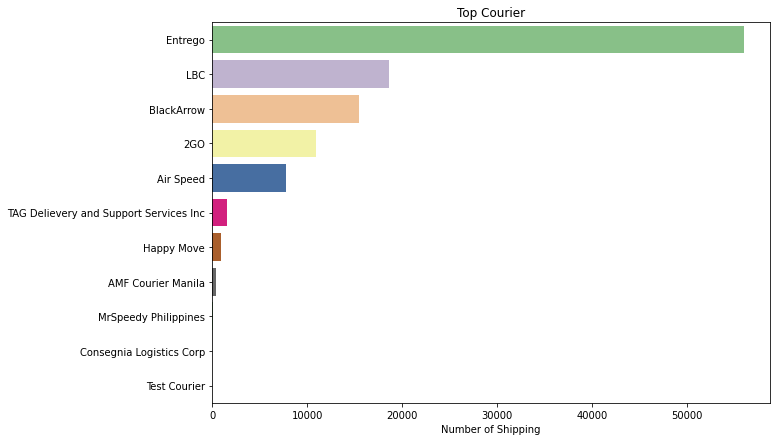

In [15]:
plt.figure(figsize=(10,7))
count=dataset['Courier Name'].value_counts()
sns.barplot(x=count,y=count.index,palette='Accent')
plt.title("Top Courier")
plt.xlabel("Number of Shipping")

## **Entrego, LBC, and BlackArrow are the top Couriers. Are there any surprises on your part?**

Text(0.5, 0, 'Number of Shipping')

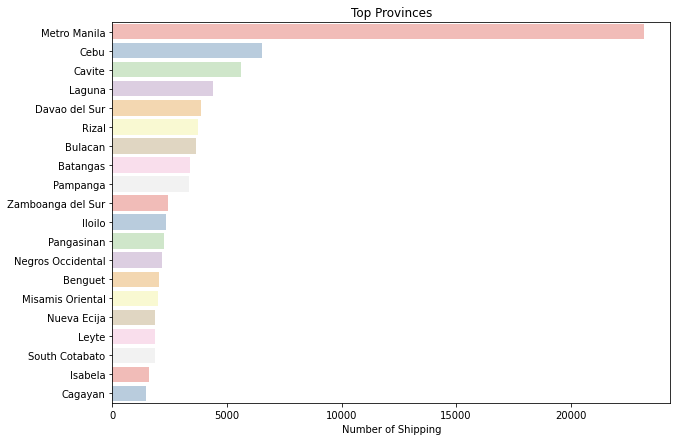

In [16]:
plt.figure(figsize=(10,7))
count=dataset['Consumer Address: Province'].value_counts()[:20]
sns.barplot(x=count,y=count.index,palette='Pastel1')
plt.title("Top Provinces")
plt.xlabel("Number of Shipping")

# **Not enough to tell, let me categorize it by Region.**

In [17]:
url = 'https://simple.wikipedia.org/wiki/Provinces_of_the_Philippines'

df4 = pd.read_html(url, header=0)[1]

df4 = df4[['Province','Region']]

df4 = df4.join(df4['Province'].str.split('[',1, expand=True).rename(columns={0:'Consumer Address: Province', 1:'Remove'}))
df4 = df4[['Consumer Address: Province','Region']]

df4.loc[df4.Region == 'ARMM[5]'] = 'ARMM'

dataset = dataset.merge(df4, on='Consumer Address: Province', how='left')


Text(0.5, 0, 'Number of Shipping')

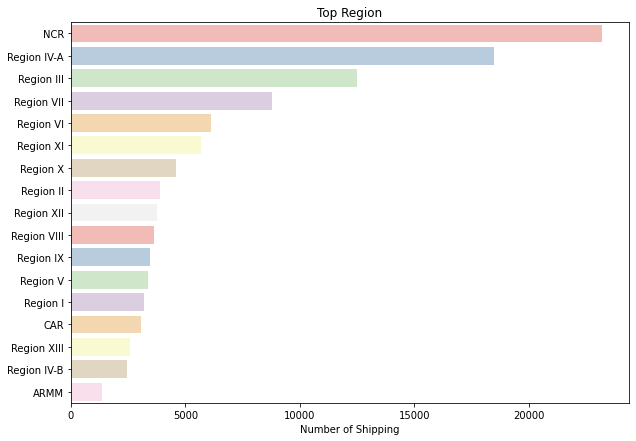

In [18]:
plt.figure(figsize=(10,7))
count=dataset['Region'].value_counts()[:20]
sns.barplot(x=count,y=count.index,palette='Pastel1')
plt.title("Top Region")
plt.xlabel("Number of Shipping")

## **A bit better. No surprises for NCR at the Top. Do you have any Region on mind that you would like to expand on?**

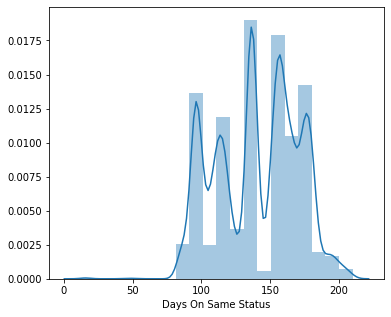

In [19]:
plt.figure(figsize=(6,5))
rating=dataset[dataset['Courier Status']!='Delivered']['Days On Same Status'].dropna()
sns.distplot(rating,bins=20)

# This is quite alarming. How is your business process of letting the parcel be the same for over a hundred days? Aside from that, not much uniformity and coherence.

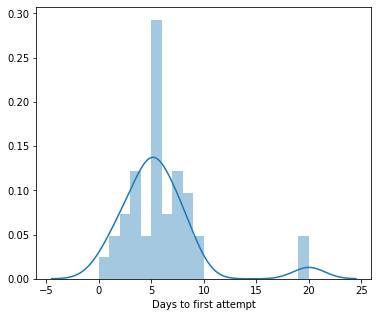

In [20]:
plt.figure(figsize=(6,5))
rating=dataset['Days to first attempt'].dropna()#.apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

### **Around 3 to 7 days before the follow up on the first delivery attempt. Are you satisfied with the speed on the follow up or should we improve more?**

Text(0.5, 1.0, 'Total Shipping Orders')

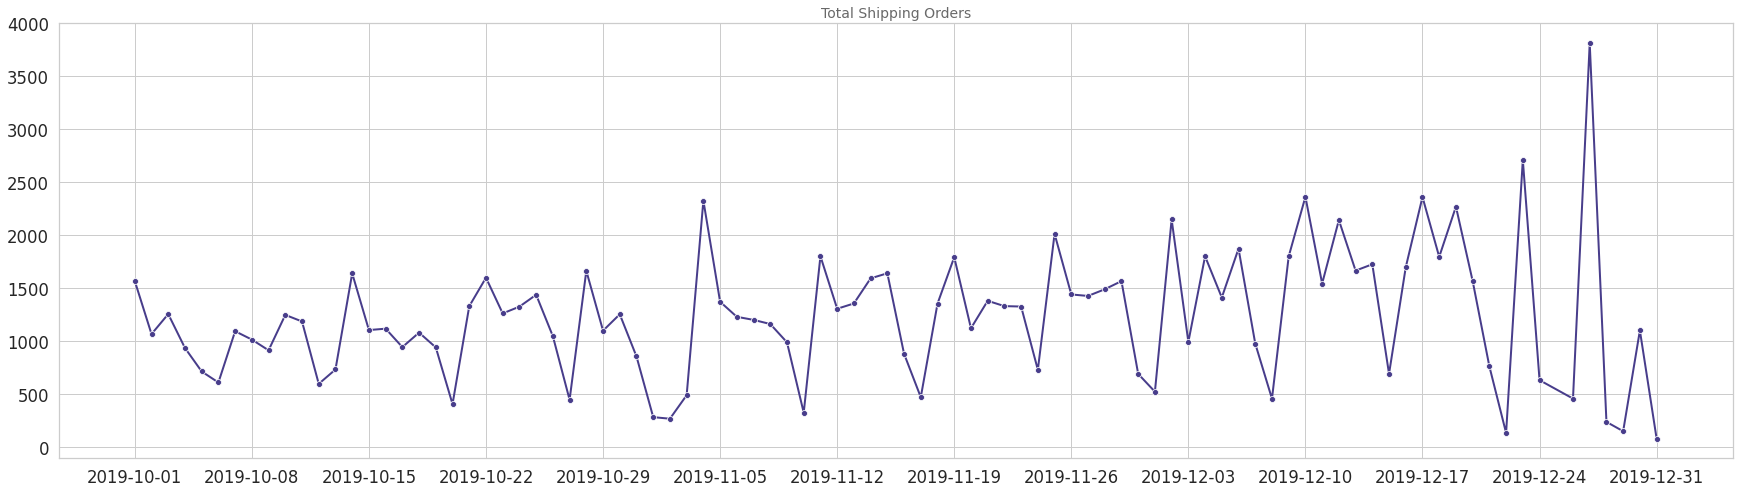

In [59]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(30,8))
sns.set(font_scale=1.5, style="whitegrid")

ax = sns.lineplot(data=dataset['Created Date'].value_counts().sort_index(),
            color='darkslateblue', marker="o", linewidth=2)
#ax.set(xticks=dataset['Created Date'].values)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_title('Total Shipping Orders', size=14, color='dimgrey')



In [22]:
dataset.head()

,Created Date,Courier Name,ShipBill Name,Pickup Date,First delivery attempt,Days to first attempt,Final status date,Days On Same Status,CS Agent,Courier Instruction,Pending Reason,Courier Status,Consumer Address: Province,Region
0,2019-10-01,LBC,SB-0000489038,2019-10-01,NaT,NaN,NaT,166,Marife Logico,Redeliver ASAP,Consignee Out,RTS Unclaimed/Other,Davao del Sur,Region XI
1,2019-10-01,2GO,SB-0000489039,2019-10-01,NaT,NaN,NaT,194,NaN,NaN,NaN,Delivered,Bulacan,Region III
2,2019-10-01,Entrego,SB-0000489040,2019-10-01,NaT,NaN,NaT,194,NaN,NaN,NaN,Delivered,Cavite,Region IV-A
3,2019-10-01,Air Speed,SB-0000489041,2019-10-01,NaT,NaN,NaT,179,NaN,NaN,NaN,Cancel Not Shipped,Cebu,Region VII
4,2019-10-01,TAG Delievery and Support Services Inc,SB-0000489042,2019-10-01,NaT,NaN,NaT,194,NaN,NaN,NaN,Delivered,Metro Manila,NCR


In [34]:
def delivery_check(status):
    if status == 'Delivered':
        res = 'Yes'
    else:
        res = 'No'
    return res

dataset['Successful Delivery'] = dataset['Courier Status'].apply(delivery_check)

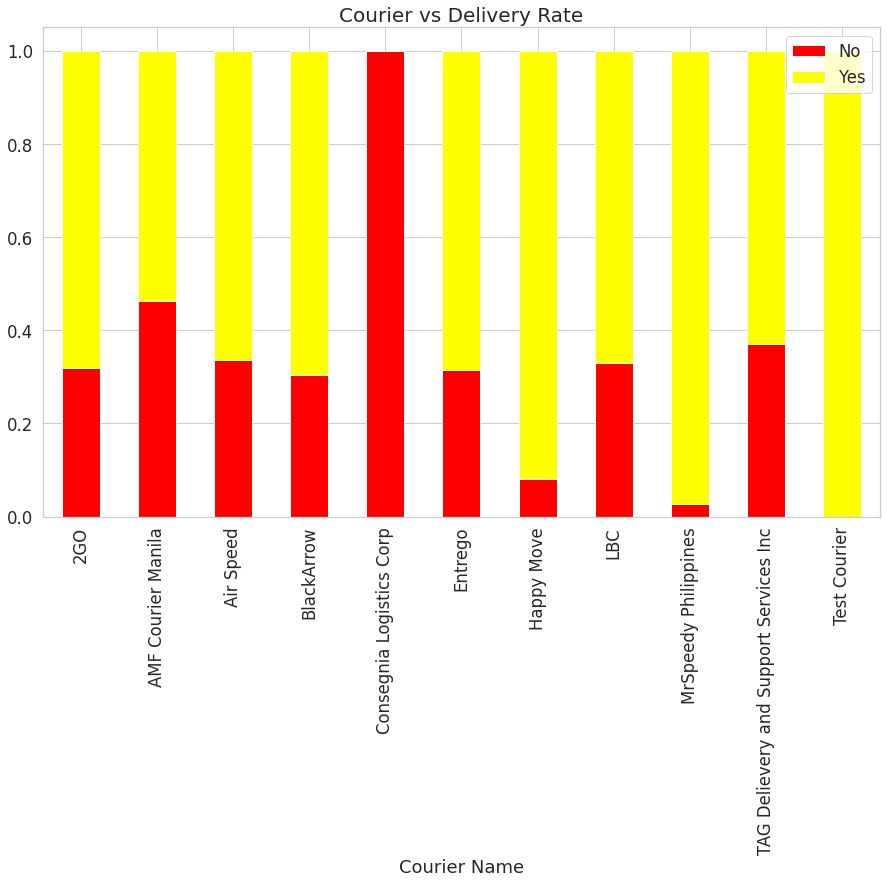

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(dataset['Courier Name'], dataset['Successful Delivery'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Courier vs Delivery Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



# **The successful deliveries of each courier is too satisfactory at first glance but let us filter that there must be at least 100 record for each courier** 

In [56]:
 dataset['Courier Name'].value_counts()

Entrego                                   55964
LBC                                       18665
BlackArrow                                15487
2GO                                       10974
Air Speed                                  7817
TAG Delievery and Support Services Inc     1541
Happy Move                                  907
AMF Courier Manila                          441
MrSpeedy Philippines                         38
Consegnia Logistics Corp                      2
Test Courier                                  1
Name: Courier Name, dtype: int64

## **Before filtering there are three couriers that has a count of less than a 100.**

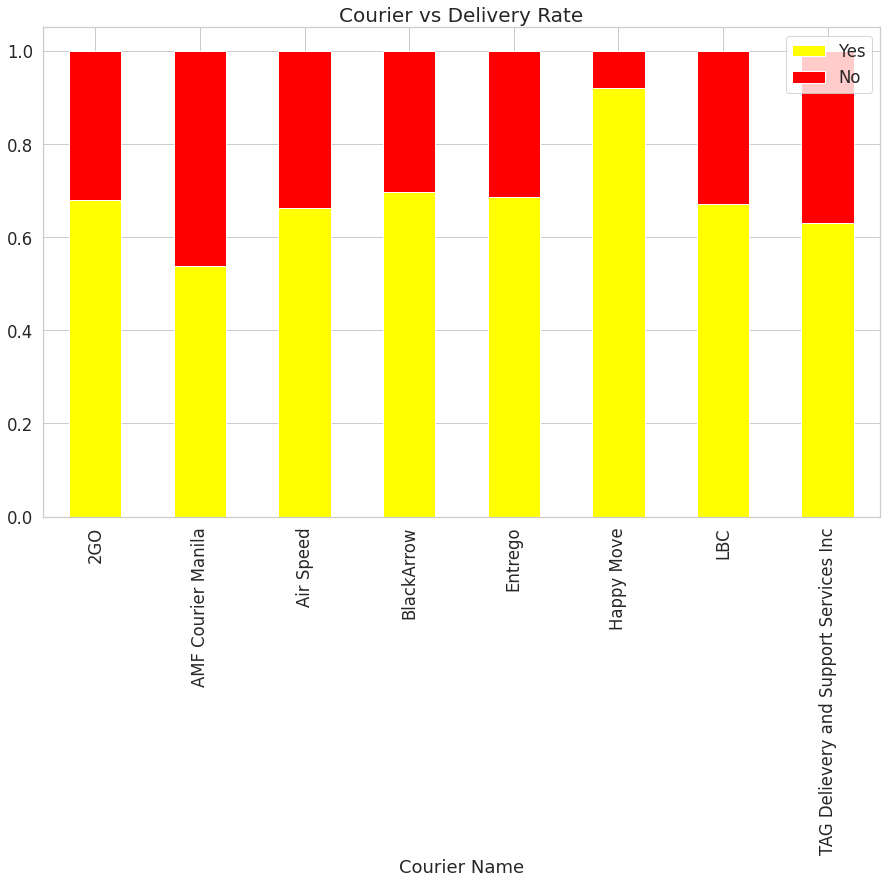

In [122]:
counts = dataset['Courier Name'].value_counts()
df5 = dataset[dataset['Courier Name'].isin(counts[counts > 100].index)]
df5['Courier Name'].value_counts()

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df5['Courier Name'], df5['Successful Delivery'])
x = x[['Yes', 'No']]
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['yellow','red'])
plt.title('Courier vs Delivery Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



# AMF Courier Manila is approximately around 50% of successful Delivery for this Period

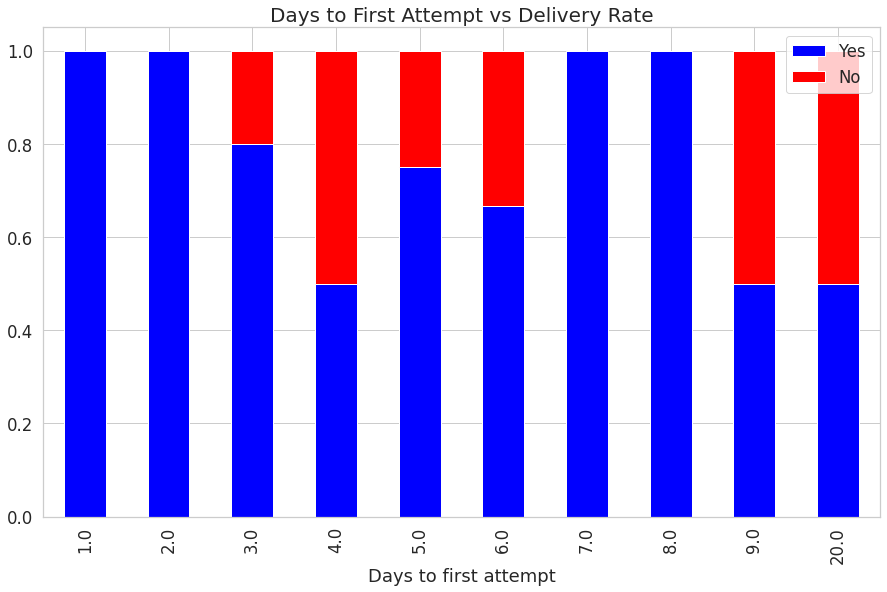

In [123]:
plt.rcParams['figure.figsize'] = (15, 9)
df6 = dataset[dataset['Days to first attempt']>0]
x = pd.crosstab(df6['Days to first attempt'], df6['Successful Delivery'])
x = x[['Yes', 'No']]
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','red'])
plt.title('Days to First Attempt vs Delivery Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



## **It is more likely the delivery will be succesful if your follow up os within 1 to 3 days**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1330: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



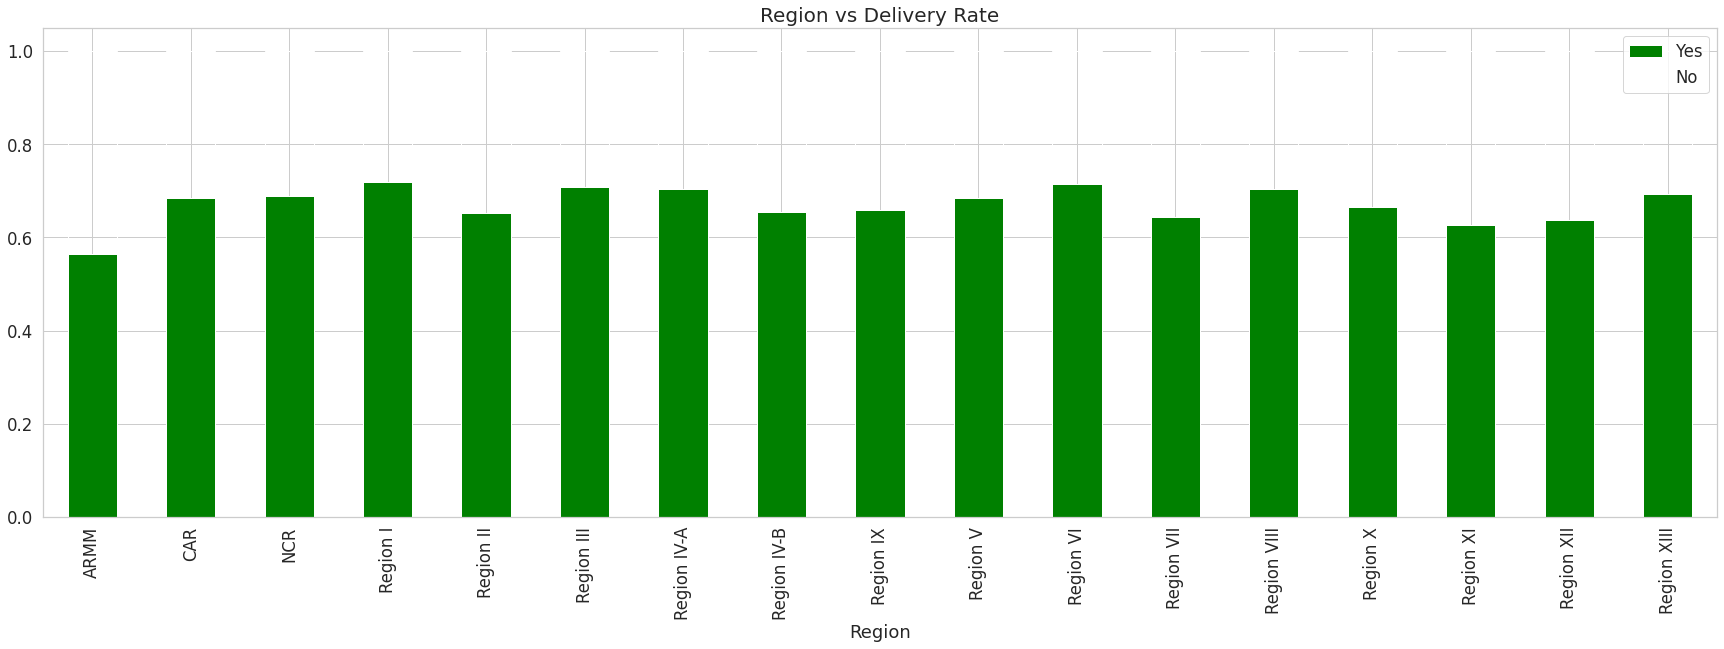

In [133]:
plt.rcParams['figure.figsize'] = (30, 9)
x = pd.crosstab(dataset['Region'], dataset['Successful Delivery'])
x = x[['Yes', 'No']]
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green',''])
plt.title('Region vs Delivery Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



**Although the Delivery Rate for all Region is above 50% it is better to take a closer look**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1330: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



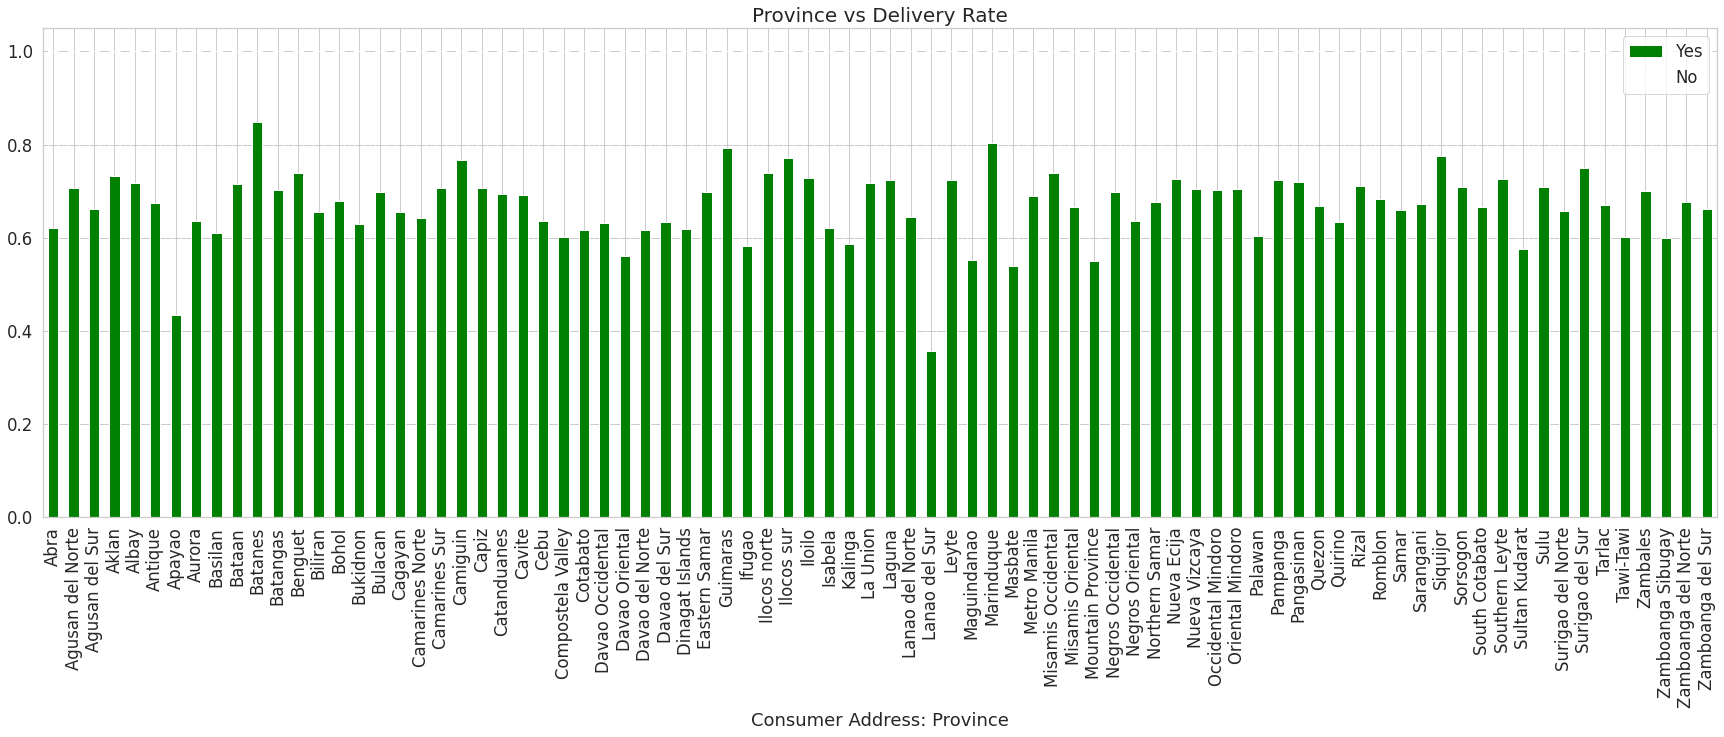

In [135]:
plt.rcParams['figure.figsize'] = (30, 9)
x = pd.crosstab(dataset['Consumer Address: Province'], dataset['Successful Delivery'])
x = x[['Yes', 'No']]
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green',''])
plt.title('Province vs Delivery Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



## **There are two province with below 50% in delivery attempts for this period. Lanao Del Sur and Apayao**

In [141]:
from geopy.geocoders import Nominatim
locations=pd.DataFrame({"Name":dataset['Consumer Address: Province'].unique()})
#locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
Del_locations=pd.DataFrame(dataset['Consumer Address: Province'].value_counts().reset_index())
Del_locations.columns=['Name','count']
Del_locations=Del_locations.merge(locations,on='Name',how="left").dropna()
Del_locations['count'].max()
def generateBaseMap(default_location=[12.879721,121.774017], default_zoom_start=5.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
from folium.plugins import HeatMap
import folium
import numpy as np
import folium.plugins as plugins
from folium.plugins import HeatMapWithTime
lat,lon=zip(*np.array(Del_locations['geo_loc']))
Del_locations['lat']=lat
Del_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Del_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)

In [147]:
def generateBaseMap(default_location=[12.879721,121.774017], default_zoom_start=4.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
from folium.plugins import HeatMap
import folium
import numpy as np
import folium.plugins as plugins
from folium.plugins import HeatMapWithTime
lat,lon=zip(*np.array(Del_locations['geo_loc']))
Del_locations['lat']=lat
Del_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Del_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)

basemap